<a href="https://colab.research.google.com/github/Erikellerx/Projects_in_MLAI/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

**Intro**

Breast cancer, like other cancer, could cause severe damage to the human body. However, it is difficult to tell whether a cancer is malignant or benign, which might lead to a very different treatment. This notebook adopts data from the Breast Cancer Wisconsin (Diagnostic) Data Set, trying to solve and distinguish a cancer diagnosis given a digitized image of a needle aspirate of a breast mass. This problem can be ideally solved by logistic regression since the result is only M = malignant and B = benign.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
import random
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Getting Data**

In [ ]:
!pwd
# https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('./drive/MyDrive/UzmaML/data.csv')
df.head()

/content


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Check null values**

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There is no missing values in this dataset. 

In [ ]:
df.shape

(569, 33)

**Drop the id and Unnamed param**

In [ ]:
df.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Graph below shows that malignant breast cancer tends to have a higher mean area.
Benign cancer tends to have a centralized distribution. 



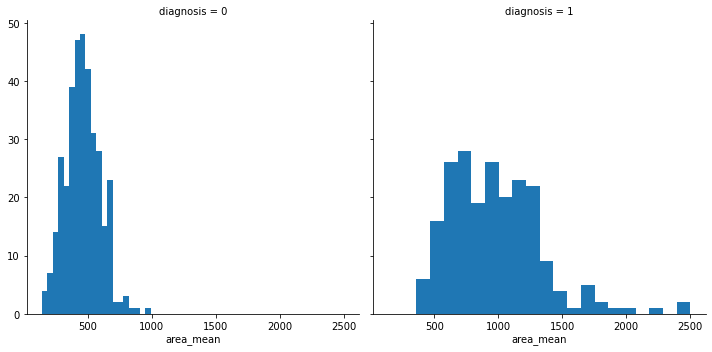

In [ ]:
g = sns.FacetGrid(df, col='diagnosis', height=5)
g.map(plt.hist, 'area_mean', bins=20)

Graph below shows that concave points worst has a strong relationship with the result of diagnosis. 

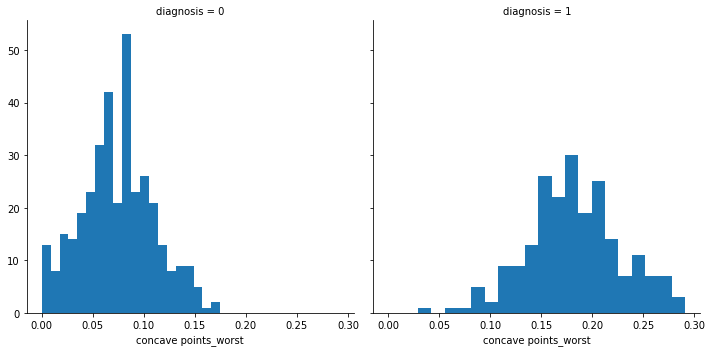

In [ ]:
g = sns.FacetGrid(df, col='diagnosis', height=5)
g.map(plt.hist, 'concave points_worst', bins=20)

**Features Correlation**

Based on the heatmap and correlation value shown below. Our diagnosis(predicted value) strongly correlates with concave points worst, perimeter worst, etc. Also, some features are strongly correlated to each other. Some features may not significantly correlate to our diagnosis. But they are strongly correlated with other features that may be combined to impact our diagnosis result. 

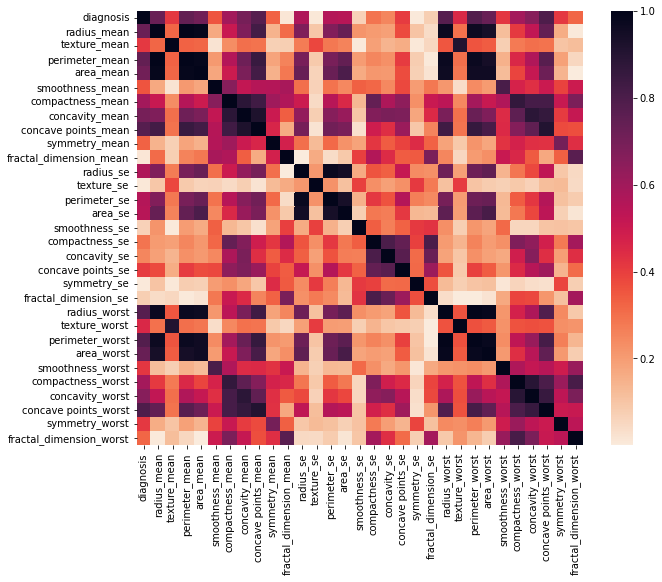

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')

In [ ]:
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

Below is the groundtruth value of our dataset. Noted that this result (B and M) doesn't evenly distributed together with the dataset is about individual's medical condition. It is important to focus more on f1 score and FP than merely accuracy.

In [ ]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

**Data Normalization and split**

In [ ]:
from sklearn import preprocessing

#change M and B in prediction into 0 and 1
if "M" in df.diagnosis.values or "B" in df.diagnosis.values : 
  df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]
pred = df.diagnosis.values
data = df.drop(['diagnosis'], axis=1)
#normalization
data = ((data - np.min(data)) / (np.max(data) - np.min(data))).values

X_train, X_test, y_train, y_test = train_test_split(data, pred, test_size=0.2, random_state=42)

# Logistic Regression

In [ ]:
import pdb

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def adagrad(cost, Gw, Gb, dw, db , lr, eps):
  Gw += dw ** 2
  Gb += db ** 2 
  stepw = lr / (np.sqrt(Gw + eps)) * dw
  stepb = lr / (np.sqrt(Gb + eps)) * db 
  return stepw, stepb


class myLogisticRegression:

  def __init__(self, maxiter = 10000, eps = 0.001, lr = 0.001):
    self.maxiter = maxiter
    self.eps = eps 
    self.lr = lr 
  
  def fit(self,X_train, y_train, GD, verbose = False):
    if(GD == "Batch"):
      self.Batch(X_train,y_train,verbose = verbose)
    else: 
      self.SGD(X_train,y_train, verbose = verbose)

  def Batch(self, X_train, y_train, verbose = False, momentum = 0.9, optimization = "Normal"):
    #initialize
    w_t = np.zeros(X_train.shape[1]) #weight
    t = 0 #epoch
    b = 0 #bias
    vw,vb = 0,0 #velocity for Momentum
    loss = [] #cost/loss
    Gw = np.zeros(X_train.shape[1]) # Adagrad w
    Gb = 0 #Adagrad b
    while(t < self.maxiter):
      t += 1

      #calculate cost and gradient
      A = sigmoid(np.dot(w_t, X_train.T) + b) 
      cost = (-1/len(X_train)) * np.sum(y_train * np.log(A) + (1 - y_train) * np.log(1 - A))
      dw = np.dot(X_train.T, (A - y_train).T) / len(X_train)
      db = np.sum(A - y_train) / len(X_train)

      #step
      if optimization == "Momentum":
        vw = momentum * vw + self.lr * dw
        vb = momentum * vb + self.lr * db
      elif optimization == "adagrad":
        stepw, stepb = adagrad(cost, Gw, Gb, dw, db , self.lr, self.eps)

      #update
      if optimization == "Normal":
        w_t = w_t - self.lr * dw
        b = b - self.lr * db
      elif optimization == "Momentum":
        w_t = w_t - vw 
        b = b - vb 
      elif optimization == "adagrad":
        w_t = w_t - stepw
        b = b - stepb

      #record loss and show result
      if t % 10 == 0:
        loss.append(cost)
      if verbose and t % 1000 == 0:
          print("Iteration: {}, Cost: {}".format(t, cost))
      if(cost <= self.eps):
        break

    #record weight and bias
    self.w_t = w_t
    self.b = b 

    #show loss graph
    if verbose:
      fig = plt.plot(loss)
      plt.ylabel("Cost")
      plt.show()

    return w_t, b, loss 
  

  def SGD(self, X_train, y_train, verbose = False):
    #initialize
    w_t = np.zeros(X_train.shape[1]) #weight
    t = 0 #epoch
    b = 0 #bias
    index = [n for n in range(len(X_train))] #index for randomly select
    loss = [] #log loss 

    while(t < self.maxiter):
      t += 1
      random.shuffle(index) #random select
      loss_total = 0
      for i in index:
        x = X_train[i]
        y = y_train[i]

        #step: calculate gradient and cost
        A = sigmoid(np.dot(w_t, x.T) + b)    
        cost = (-1) * (y * np.log(A) + (1 - y) * np.log(1 - A))
        dw = np.dot(x.T, (A - y).T) / len(x) 
        db = np.sum(A - y) / len(x) 

        #update
        w_t = w_t - self.lr * dw 
        b = b - self.lr * db 
        loss_total += cost

        #check loss
        if(cost <= self.eps):
          self.w_t = w_t 
          self.b = b
          break

      loss.append(loss_total / len(index))
      #verbose
      if verbose and t % 1000 == 0:
            print("Iteration: {}, Cost: {}".format(t, cost))
    if verbose:
      fig = plt.plot(loss)
      plt.ylabel("Cost")
      plt.show()
         
    self.w_t = w_t 
    self.b = b


      
  def predict(self, X_test):
    result = sigmoid(np.dot(self.w_t, X_test.T) + self.b)
    result[result > 0.5] = 1
    result[result <= 0.5] = 0
    return result 


**Stochastic Gradient Ascent**

Iteration: 1000, Cost: 0.4283352585640317
Iteration: 2000, Cost: 0.27027458395592435
Iteration: 3000, Cost: 0.20399190117275307
Iteration: 4000, Cost: 0.0009704278266442977
Iteration: 5000, Cost: 0.0006198409820025264
Iteration: 6000, Cost: 0.00041353745442245166
Iteration: 7000, Cost: 0.00027916221545152127
Iteration: 8000, Cost: 0.00020121595148969094
Iteration: 9000, Cost: 0.00016111547614812305
Iteration: 10000, Cost: 0.0007130373692365957


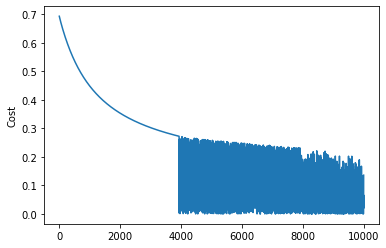

Acc:  0.956140350877193
F1 score:  0.9397590361445783


In [ ]:
model = myLogisticRegression(maxiter = 10000)
model.fit(X_train, y_train, GD = "SGD", verbose = True)
result1 = model.predict(X_test)

print("Acc: ", accuracy_score(y_test, result1))
print("F1 score: ",f1_score(y_test, result1) )

**Batch Gradient Descent**

Iteration: 1000, Cost: 0.6654383850795603
Iteration: 2000, Cost: 0.6410736495813518
Iteration: 3000, Cost: 0.6188577461993303
Iteration: 4000, Cost: 0.5984069014439674
Iteration: 5000, Cost: 0.5795196446660005
Iteration: 6000, Cost: 0.5620415638474874
Iteration: 7000, Cost: 0.5458378642596742
Iteration: 8000, Cost: 0.5307875975010954
Iteration: 9000, Cost: 0.5167819993073893
Iteration: 10000, Cost: 0.5037234804548949


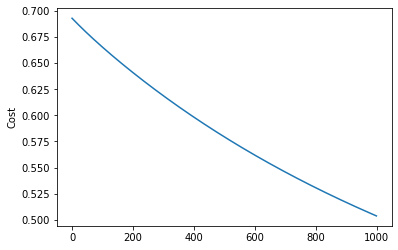

Acc:  0.9122807017543859
F1 score:  0.868421052631579


In [ ]:
model = myLogisticRegression(maxiter = 10000)
model.fit(X_train, y_train, GD = "Batch", verbose = True)
result2 = model.predict(X_test)

print("Acc: ", accuracy_score(y_test, result2))
print("F1 score: ",f1_score(y_test, result2) )

**Batch with Momentum**

Iteration: 1000, Cost: 0.5045294702723795
Iteration: 2000, Cost: 0.4101464654808084
Iteration: 3000, Cost: 0.35457383001368314
Iteration: 4000, Cost: 0.31781202042499695
Iteration: 5000, Cost: 0.2915090633171034
Iteration: 6000, Cost: 0.271616890082892
Iteration: 7000, Cost: 0.25594421530426836
Iteration: 8000, Cost: 0.2432027654071196
Iteration: 9000, Cost: 0.23258548020726655
Iteration: 10000, Cost: 0.22356069605581322


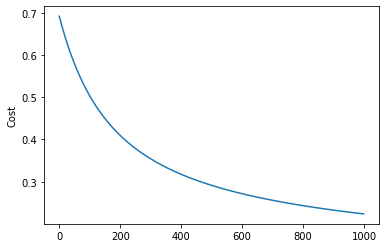

Acc:  0.956140350877193
F1 score:  0.9397590361445783


In [ ]:
model = myLogisticRegression(maxiter = 10000, lr = 0.001)
model.Batch(X_train, y_train, verbose = True, optimization = "Momentum")
result3 = model.predict(X_test)

print("Acc: ", accuracy_score(y_test, result3))
print("F1 score: ",f1_score(y_test, result3) )

**Batch with Adagrad**

Iteration: 1000, Cost: 0.31315457443370565
Iteration: 2000, Cost: 0.2575783679601028
Iteration: 3000, Cost: 0.22855369951550325
Iteration: 4000, Cost: 0.20967099155574997
Iteration: 5000, Cost: 0.1960395147428558
Iteration: 6000, Cost: 0.18556397232521388
Iteration: 7000, Cost: 0.17716662755090248
Iteration: 8000, Cost: 0.1702263980599497
Iteration: 9000, Cost: 0.1643560010391885
Iteration: 10000, Cost: 0.15929941319481225


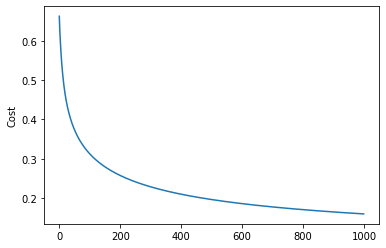

Acc:  0.9649122807017544
F1 score:  0.951219512195122


In [ ]:
model = myLogisticRegression(maxiter = 10000, lr = 0.01)
model.Batch(X_train, y_train, verbose = True, optimization = "adagrad")
result4 = model.predict(X_test)

print("Acc: ", accuracy_score(y_test, result4))
print("F1 score: ",f1_score(y_test, result4) )

#Result Analysis

Above, I implement both **Batch Gradient Descend** and **SGD** together with two optimizers (**Momentum** and **Adagrad**) targeting to improve performance in Batch Gradient Descend. I set the max iteration to be 10000 and the learning rate 0.001 except 0.01 when implementing adagrad optimizer. The training will terminate if the cost is lower than 0.001 to prevent overfitting. The momentum is set to 0.9, as suggested. 


**Gradient Descent variants**: As the cost graph clearly shows, Batch and SGD have unique patterns due to different means to update the gradient. Batch Gradient Descent is very efficient in terms of running time. It can achieve a decent result in a limited time, but there is still much room to improve. SGD, on the other hand, took a much longer time to compute. And it does have a unique fluctuation as loss is dropping, which is similar to what the paper indicated. This fluctuation makes the result jump to new and potentially better local minima. This can also be shown by the result of accuracy and f1 score. 

**Batch adding optimizer**: I implement Momentum and adagrad. By adding an optimizer, we can clearly see from the graph above that two optimizers can lead to converging quicker and better results. It is definitely a positive impact when we include an optimizer in our algorithm. When comparing Momentum and adagrad, adagrad initially didn't perform well when we set the learning rate to 0.001, even though I increased the number of iterations. However, after going through the paper again, I set the learning rate to 0.01, which is suggested. The performance of adagrad increases dramatically and outperforms Momentum.  

I also utilize packages from sklearn below as a reference. The result shows that the Batch + optimizer can match the result and performance from sklearn. 



In [ ]:
model = LogisticRegression(class_weight='balanced', penalty = 'none')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Acc: ", accuracy_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred) )

Acc:  0.9122807017543859
F1 score:  0.888888888888889


Below are the confusion matrix projected onto a heat map.

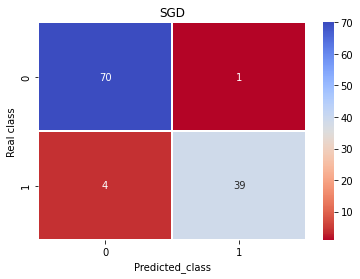

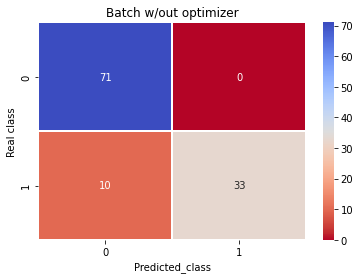

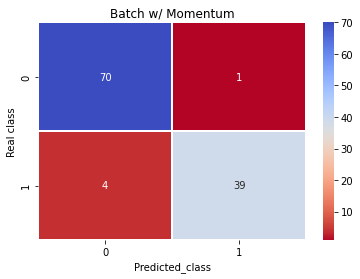

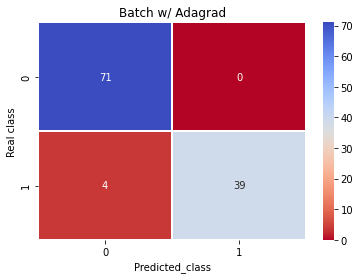

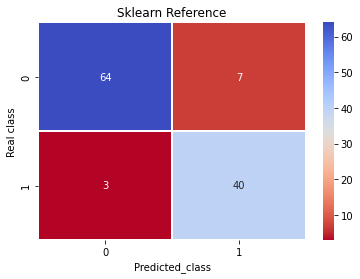

In [ ]:
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
confusionMatrix1=confusion_matrix(y_test,result1)
confusionMatrix2=confusion_matrix(y_test,result2)
confusionMatrix3=confusion_matrix(y_test,result3)
confusionMatrix4=confusion_matrix(y_test,result4)
confusionMatrix5=confusion_matrix(y_test,y_pred)


sns.heatmap(confusionMatrix1,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("SGD")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

sns.heatmap(confusionMatrix2,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Batch w/out optimizer")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

sns.heatmap(confusionMatrix3,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Batch w/ Momentum")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

sns.heatmap(confusionMatrix4,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Batch w/ Adagrad")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

sns.heatmap(confusionMatrix5,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Sklearn Reference")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()